Instructions
This quiz will have 5 conceptual questions and 10 hands-on questions, which have to be attempted based on the following problem statement.

 

Problem Statement:

Kickstarter is a crowdfunding website where people can ask people to invest in various projects and concept products. They have provided data having different attributes of a project like its name, category, the currency of funding, deadline for crowdfunding, goal and raised amounts for funding, etc.

 Dataset provided by Kickstarter - KickStarterProjects.csv

 

Attribute information:

id - project id
name - project name
subcategory - project subcategory
category - project category
currency - project currency
deadline - deadline for crowdfunding on Kickstarter
goal - goal amount in project currency
launched - launch date on Kickstarter
pledged - pledged (raised) amount in the project currency
state - project state
backers - count of backers
country - project country
usd_pledged_real - pledged (raised) amount in USD
usd_goal_real - goal amount in USD

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

/home/isaac/anaconda3/envs/opencv_env/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [52]:
df = pd.read_csv('KickStarterProjects.csv')

In [28]:
df.sample(10)

,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
157019,1798749992,The Biscotti Diva,Small Batch,Food,USD,21-06-2016,15000.00,01-06-2016 08:27,0.0,failed,0,US,0.00,15000.00
112514,1571527719,Lee Harvey Roswell's Hephaestus Print Project,Digital Art,Art,USD,12-12-2014,778.00,24-11-2014 22:41,844.0,successful,15,US,844.00,778.00
288064,535678573,Rite On! Rite Now! - DEBUT Album Release -,Music,Music,USD,16-02-2013,2000.00,17-01-2013 09:41,2180.0,successful,46,US,2180.00,2000.00
96211,1489064249,Avenue O Food Truck,Food,Food,USD,21-03-2014,10500.00,15-02-2014 01:45,75.0,failed,3,US,75.00,10500.00
13341,1067167274,Rate My Landlord,Web,Technology,AUD,21-02-2015,15000.00,22-01-2015 04:35,9.0,failed,5,AU,7.05,11742.60
366509,937476720,The Baseball Murder Diaries (Canceled),Fiction,Publishing,USD,08-10-2012,20000.00,08-09-2012 17:09,0.0,canceled,0,US,0.00,20000.00
345159,828227768,US Philately Museum near Disneyland,Art,Art,USD,18-01-2017,28000.00,19-12-2016 01:11,241.0,failed,7,US,241.00,28000.00
29542,1150150467,Seuss-Escher Lovechilde goes the Whole 9 Yards!,Painting,Art,USD,06-06-2012,7654.32,04-05-2012 15:37,7271.0,failed,97,US,7271.00,7654.32
371229,961640881,The Love Life and Death EP (Canceled),Rock,Music,USD,06-02-2012,5000.00,08-12-2011 05:44,1.0,canceled,1,US,1.00,5000.00
231209,245189865,W. T. F. ? A Documentary on Women's Tackle F...,Documentary,Film & Video,USD,29-01-2012,10000.00,30-12-2011 09:37,105.0,failed,3,US,105.00,10000.00


In [4]:
df.shape

(378661, 14)

In [6]:
df.isnull().sum()

ID                  0
name                4
subcategory         0
category            0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

Are there any duplicates in the project names?

In [8]:
df.name.unique().shape

(375723,)

In [9]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
378656    False
378657    False
378658    False
378659    False
378660    False
Length: 378661, dtype: bool

In [11]:
df.duplicated().value_counts()

False    378661
dtype: int64

If there are any missing values in the dataframe, drop the rows that contain missing values before moving ahead, and use that dataframe for subsequent questions.

How many unique project states are there in the data and which among them is the most frequent?

In [12]:
df.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [13]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [14]:
d = df.dropna(axis = 0, inplace=False)

In [16]:
d.shape

(378657, 14)

In [29]:
df.dropna(axis = 0, inplace=True)

In [19]:
df.shape

(378657, 14)

Which of the following values (respectively) are the closest approximation of the mean and median number of backers the projects in the dataset have been able to secure?

In [30]:
df.columns

Index(['ID', 'name', 'subcategory', 'category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

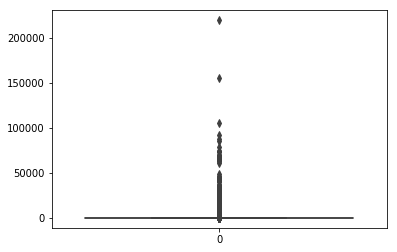

In [22]:
sns.boxplot(data=df.backers);

In [23]:
df.describe()

,ID,goal,pledged,backers,usd_pledged_real,usd_goal_real
count,3.786570e+05,3.786570e+05,3.786570e+05,378657.000000,3.786570e+05,3.786570e+05
mean,1.074732e+09,4.908068e+04,9.683080e+03,105.618544,9.059018e+03,4.545425e+04
std,6.190872e+08,1.183397e+06,9.563651e+04,907.189767,9.097382e+04,1.152956e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,1.000000e-02
25%,5.382499e+08,2.000000e+03,3.000000e+01,2.000000,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,6.243800e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08


Based on the results obtained in Question 5, are there any indications that the number of backers has extreme values?

In [31]:
data = df.copy()

In [32]:
data.head()

,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09-10-2015,1000.0,11-08-2015 12:12,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01-11-2017,30000.0,02-09-2017 04:43,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26-02-2013,45000.0,12-01-2013 00:20,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16-04-2012,5000.0,17-03-2012 03:24,1.0,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29-08-2015,19500.0,04-07-2015 08:35,1283.0,canceled,14,US,1283.0,19500.00


The goal amount in USD has a highly skewed distribution. Please apply min-max scaling to this column and confirm if that helped in reducing the skewness.

Note: Create a new scaled column, do not replace the existing column.

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

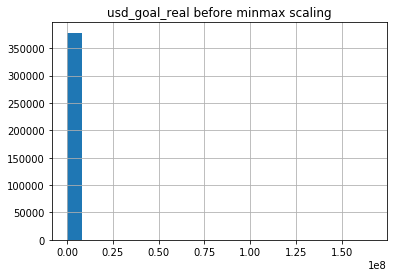

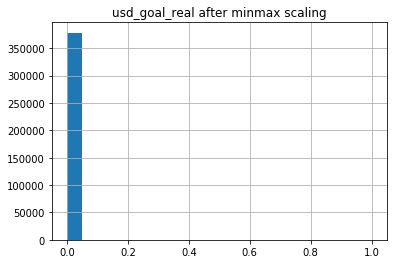

In [26]:
# replacing with scaled 
data['usd_goal_real'].hist(bins=20)
plt.title('usd_goal_real before minmax scaling')
plt.show()

data[['usd_goal_real']] = MinMaxScaler().fit_transform(
    data[['usd_goal_real']]
)

data['usd_goal_real'].hist(bins=20)
plt.title('usd_goal_real after minmax scaling')
plt.show()

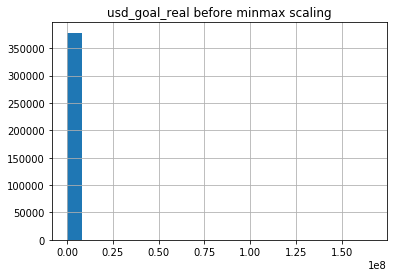

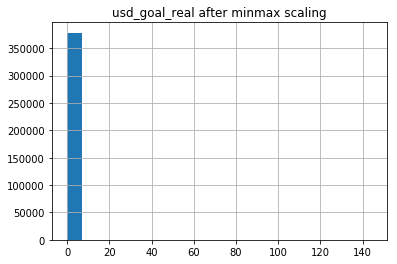

In [33]:
# replacing with scaled 
data['usd_goal_real'].hist(bins=20)
plt.title('usd_goal_real before minmax scaling')
plt.show()

data[['usd_goal_real']] = StandardScaler().fit_transform(
    data[['usd_goal_real']]
)

data['usd_goal_real'].hist(bins=20)
plt.title('usd_goal_real after minmax scaling')
plt.show()

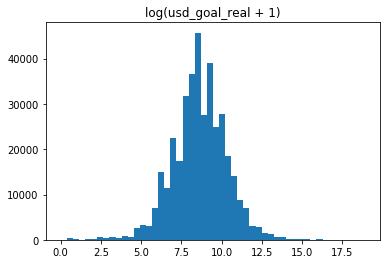

In [36]:
plt.hist(np.log(df['usd_goal_real'] + 1), 50)
plt.title('log(usd_goal_real + 1)')
plt.show()

Which of the following project categories has been able to raise the most funds on average?

In [38]:
df.category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [42]:
df.groupby(['category'])[['usd_pledged_real']].mean()

,usd_pledged_real
category,
Art,3221.093567
Comics,6610.443828
Crafts,1632.907282
Dance,3452.946356
Design,24417.846732
Fashion,5712.450839
Film & Video,6158.073703
Food,5113.669716
Games,21042.491442


In [43]:
df.head()

,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09-10-2015,1000.0,11-08-2015 12:12,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01-11-2017,30000.0,02-09-2017 04:43,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26-02-2013,45000.0,12-01-2013 00:20,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16-04-2012,5000.0,17-03-2012 03:24,1.0,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29-08-2015,19500.0,04-07-2015 08:35,1283.0,canceled,14,US,1283.0,19500.00


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378657 entries, 0 to 378660
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378657 non-null  int64  
 1   name              378657 non-null  object 
 2   subcategory       378657 non-null  object 
 3   category          378657 non-null  object 
 4   currency          378657 non-null  object 
 5   deadline          378657 non-null  object 
 6   goal              378657 non-null  float64
 7   launched          378657 non-null  object 
 8   pledged           378657 non-null  float64
 9   state             378657 non-null  object 
 10  backers           378657 non-null  int64  
 11  country           378657 non-null  object 
 12  usd_pledged_real  378657 non-null  float64
 13  usd_goal_real     378657 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 43.3+ MB


In [45]:
df['launched_Date'] = pd.to_datetime(df['launched'])

In [48]:
df.launched_Date.dt.month.value_counts().sort_values()

12    24428
2     29876
4     31038
6     31381
9     31538
5     31573
8     31619
11    32135
3     32837
10    33409
1     34346
7     34477
Name: launched_Date, dtype: int64

In [49]:
data.pledged.quantile(0.6)

1411.6800000000048

In [50]:
df.name.duplicated().sum()

2935

In [53]:
df.isnull().sum()

ID                  0
name                4
subcategory         0
category            0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64